In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x = df[['Spending Score (1-100)']]

In [ ]:
x.values

array([[39],
       [81],
       [ 6],
       [77],
       [40],
       [76],
       [ 6],
       [94],
       [ 3],
       [72],
       [14],
       [99],
       [15],
       [77],
       [13],
       [79],
       [35],
       [66],
       [29],
       [98],
       [35],
       [73],
       [ 5],
       [73],
       [14],
       [82],
       [32],
       [61],
       [31],
       [87],
       [ 4],
       [73],
       [ 4],
       [92],
       [14],
       [81],
       [17],
       [73],
       [26],
       [75],
       [35],
       [92],
       [36],
       [61],
       [28],
       [65],
       [55],
       [47],
       [42],
       [42],
       [52],
       [60],
       [54],
       [60],
       [45],
       [41],
       [50],
       [46],
       [51],
       [46],
       [56],
       [55],
       [52],
       [59],
       [51],
       [59],
       [50],
       [48],
       [59],
       [47],
       [55],
       [42],
       [49],
       [56],
       [47],
       [54],
       [53],

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_scaled.shape

(200, 1)

In [ ]:
x_scaled

array([[-0.43480148],
       [ 1.19570407],
       [-1.71591298],
       [ 1.04041783],
       [-0.39597992],
       [ 1.00159627],
       [-1.71591298],
       [ 1.70038436],
       [-1.83237767],
       [ 0.84631002],
       [-1.4053405 ],
       [ 1.89449216],
       [-1.36651894],
       [ 1.04041783],
       [-1.44416206],
       [ 1.11806095],
       [-0.59008772],
       [ 0.61338066],
       [-0.82301709],
       [ 1.8556706 ],
       [-0.59008772],
       [ 0.88513158],
       [-1.75473454],
       [ 0.88513158],
       [-1.4053405 ],
       [ 1.23452563],
       [-0.7065524 ],
       [ 0.41927286],
       [-0.74537397],
       [ 1.42863343],
       [-1.7935561 ],
       [ 0.88513158],
       [-1.7935561 ],
       [ 1.62274124],
       [-1.4053405 ],
       [ 1.19570407],
       [-1.28887582],
       [ 0.88513158],
       [-0.93948177],
       [ 0.96277471],
       [-0.59008772],
       [ 1.62274124],
       [-0.55126616],
       [ 0.41927286],
       [-0.86183865],
       [ 0

In [ ]:
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

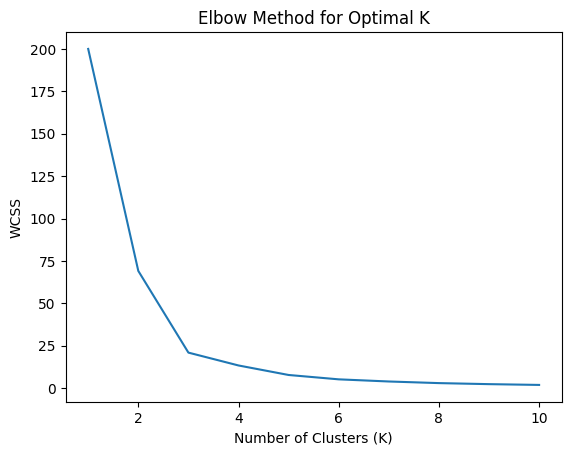

In [ ]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=40)
kmeans.fit(x_scaled)

In [ ]:
labels = kmeans.fit_predict(x_scaled)
labels

In [ ]:
df['Cluster'] = kmeans.labels_

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


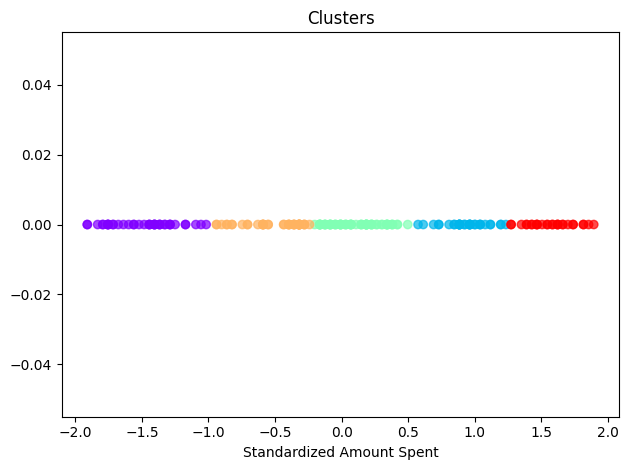

In [ ]:
plt.scatter(x_scaled, [0] * len(x_scaled), c=kmeans.labels_, cmap='rainbow', marker='o', alpha=0.7)
plt.xlabel('Standardized Amount Spent')
plt.title('Clusters')
plt.tight_layout()
plt.show()